In [ ]:
# build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [ ]:
#use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
titanic_df = pd.read_csv("train.csv")
serving_df = pd.read_csv("test.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic_df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
titanic_df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:


# Remove linhas com Fare igual a 0
titanic_df_filtered = titanic_df[titanic_df['Fare'] != 0]

# Agrupar por Pclass e calcular janelas de valor de Fare
fare_windows = titanic_df_filtered.groupby('Pclass')['Fare'].agg(['min', 'max', 'mean', 'median'])

fare_windows

,min,max,mean,median
Pclass,,,,
1,5.0000,512.3292,86.148874,61.9792
2,10.5000,73.5000,21.358661,15.0229
3,4.0125,69.5500,13.787875,8.0500


In [ ]:
titanic_df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
titanic_df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [ ]:


survived_by_pclass = titanic_df[titanic_df['Survived'] == 1].groupby('Pclass')['Survived'].count()
survived_by_pclass

,Survived
Pclass,
1,136
2,87
3,119


<Axes: xlabel='Pclass', ylabel='count'>

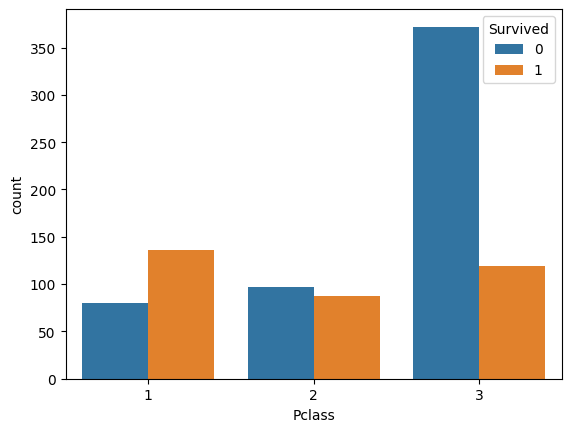

In [ ]:
import seaborn as sns

sns.countplot(x='Pclass',hue='Survived',data=titanic_df)

In [ ]:
titanic_final_df = titanic_df.drop(['Name'], axis=1)
titanic_final_df


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic_final_df= titanic_final_df[['PassengerId','Pclass',	'Sex',	'Age',	'SibSp',	'Parch',	'Ticket',	'Fare',	'Cabin', 'Embarked', 'Survived',]]
titanic_final_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,male,26.0,0,0,111369,30.0000,C148,C,1


In [ ]:
# Select only numerical features for correlation calculation
numerical_features = titanic_final_df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Display the correlation matrix
print(correlation_matrix)

             PassengerId    Pclass       Age     SibSp     Parch      Fare  \
PassengerId     1.000000 -0.035144  0.036847 -0.057527 -0.001652  0.012658   
Pclass         -0.035144  1.000000 -0.369226  0.083081  0.018443 -0.549500   
Age             0.036847 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
SibSp          -0.057527  0.083081 -0.308247  1.000000  0.414838  0.159651   
Parch          -0.001652  0.018443 -0.189119  0.414838  1.000000  0.216225   
Fare            0.012658 -0.549500  0.096067  0.159651  0.216225  1.000000   
Survived       -0.005007 -0.338481 -0.077221 -0.035322  0.081629  0.257307   

             Survived  
PassengerId -0.005007  
Pclass      -0.338481  
Age         -0.077221  
SibSp       -0.035322  
Parch        0.081629  
Fare         0.257307  
Survived     1.000000  


In [ ]:
titanic_final_df_shouffled = titanic_final_df.sample(n=len(titanic_final_df), random_state=1)
titanic_final_df_shouffled

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
862,863,1,female,48.0,0,0,17466,25.9292,D17,S,1
223,224,3,male,NaN,0,0,349234,7.8958,NaN,S,0
84,85,2,female,17.0,0,0,SO/C 14885,10.5000,NaN,S,1
680,681,3,female,NaN,0,0,330935,8.1375,NaN,Q,0
535,536,2,female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
715,716,3,male,19.0,0,0,348124,7.6500,F G73,S,0
767,768,3,female,30.5,0,0,364850,7.7500,NaN,Q,0
72,73,2,male,21.0,0,0,S.O.C. 14879,73.5000,NaN,S,0
235,236,3,female,NaN,0,0,W./C. 6609,7.5500,NaN,S,0


In [ ]:
pd.get_dummies(titanic_final_df_shouffled['Sex']).head()

,female,male
862,True,False
223,False,True
84,True,False
680,True,False
535,True,False


In [ ]:
titanic_final_df_shouffled.drop(['Sex'], axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
862,863,1,48.0,0,0,17466,25.9292,D17,S,1
223,224,3,NaN,0,0,349234,7.8958,NaN,S,0
84,85,2,17.0,0,0,SO/C 14885,10.5000,NaN,S,1
680,681,3,NaN,0,0,330935,8.1375,NaN,Q,0
535,536,2,7.0,0,2,F.C.C. 13529,26.2500,NaN,S,1


In [ ]:
titanic_final_df = pd.concat([titanic_final_df_shouffled.drop(['Sex'], axis=1), pd.get_dummies(titanic_final_df_shouffled['Sex'])], axis=1)
titanic_final_df

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,female,male
862,863,1,48.0,0,0,17466,25.9292,D17,S,1,True,False
223,224,3,NaN,0,0,349234,7.8958,NaN,S,0,False,True
84,85,2,17.0,0,0,SO/C 14885,10.5000,NaN,S,1,True,False
680,681,3,NaN,0,0,330935,8.1375,NaN,Q,0,True,False
535,536,2,7.0,0,2,F.C.C. 13529,26.2500,NaN,S,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
715,716,3,19.0,0,0,348124,7.6500,F G73,S,0,False,True
767,768,3,30.5,0,0,364850,7.7500,NaN,Q,0,True,False
72,73,2,21.0,0,0,S.O.C. 14879,73.5000,NaN,S,0,False,True
235,236,3,NaN,0,0,W./C. 6609,7.5500,NaN,S,0,True,False


In [ ]:
pd.get_dummies(titanic_final_df['Embarked']).head()


,C,Q,S
862,False,False,True
223,False,False,True
84,False,False,True
680,False,True,False
535,False,False,True


In [ ]:
titanic_final_df.drop(['Embarked'], axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,female,male
862,863,1,48.0,0,0,17466,25.9292,D17,1,True,False
223,224,3,NaN,0,0,349234,7.8958,NaN,0,False,True
84,85,2,17.0,0,0,SO/C 14885,10.5000,NaN,1,True,False
680,681,3,NaN,0,0,330935,8.1375,NaN,0,True,False
535,536,2,7.0,0,2,F.C.C. 13529,26.2500,NaN,1,True,False


In [ ]:
titanic_final_df = pd.concat([titanic_final_df.drop(['Embarked'], axis=1), pd.get_dummies(titanic_final_df['Embarked'])], axis=1)
titanic_final_df

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,female,male,C,Q,S
862,863,1,48.0,0,0,17466,25.9292,D17,1,True,False,False,False,True
223,224,3,NaN,0,0,349234,7.8958,NaN,0,False,True,False,False,True
84,85,2,17.0,0,0,SO/C 14885,10.5000,NaN,1,True,False,False,False,True
680,681,3,NaN,0,0,330935,8.1375,NaN,0,True,False,False,True,False
535,536,2,7.0,0,2,F.C.C. 13529,26.2500,NaN,1,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,716,3,19.0,0,0,348124,7.6500,F G73,0,False,True,False,False,True
767,768,3,30.5,0,0,364850,7.7500,NaN,0,True,False,False,True,False
72,73,2,21.0,0,0,S.O.C. 14879,73.5000,NaN,0,False,True,False,False,True
235,236,3,NaN,0,0,W./C. 6609,7.5500,NaN,0,True,False,False,False,True


In [ ]:
titanic_final_df= titanic_final_df[['PassengerId','Pclass',	'Age',	'SibSp',	'Parch',	'Ticket',	'Fare',	'Cabin', 'female', 'male','C',	'Q',	'S',  'Survived',]]
titanic_final_df

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,female,male,C,Q,S,Survived
862,863,1,48.0,0,0,17466,25.9292,D17,True,False,False,False,True,1
223,224,3,NaN,0,0,349234,7.8958,NaN,False,True,False,False,True,0
84,85,2,17.0,0,0,SO/C 14885,10.5000,NaN,True,False,False,False,True,1
680,681,3,NaN,0,0,330935,8.1375,NaN,True,False,False,True,False,0
535,536,2,7.0,0,2,F.C.C. 13529,26.2500,NaN,True,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,716,3,19.0,0,0,348124,7.6500,F G73,False,True,False,False,True,0
767,768,3,30.5,0,0,364850,7.7500,NaN,True,False,False,True,False,0
72,73,2,21.0,0,0,S.O.C. 14879,73.5000,NaN,False,True,False,False,True,0
235,236,3,NaN,0,0,W./C. 6609,7.5500,NaN,True,False,False,False,True,0


In [ ]:
titanic_final_df.drop(['Ticket','Cabin'], axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,Survived
862,863,1,48.0,0,0,25.9292,True,False,False,False,True,1
223,224,3,NaN,0,0,7.8958,False,True,False,False,True,0
84,85,2,17.0,0,0,10.5000,True,False,False,False,True,1
680,681,3,NaN,0,0,8.1375,True,False,False,True,False,0
535,536,2,7.0,0,2,26.2500,True,False,False,False,True,1


In [ ]:
from sklearn.model_selection import train_test_split
x=titanic_final_df.drop(['Survived'],axis=1)
y=titanic_final_df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x_test,y_test, test_size=0.5, random_state=1)
x_train.shape, x_test.shape, x_val.shape



((712, 13), (90, 13), (89, 13))

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 273 to 154
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Age          572 non-null    float64
 3   SibSp        712 non-null    int64  
 4   Parch        712 non-null    int64  
 5   Ticket       712 non-null    object 
 6   Fare         712 non-null    float64
 7   Cabin        161 non-null    object 
 8   female       712 non-null    bool   
 9   male         712 non-null    bool   
 10  C            712 non-null    bool   
 11  Q            712 non-null    bool   
 12  S            712 non-null    bool   
dtypes: bool(5), float64(2), int64(4), object(2)
memory usage: 53.5+ KB


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
      return self
    def transform (self, X):
      imputer= SimpleImputer(strategy='mean')
      X['Age'] = imputer.fit_transform(X[['Age']])
      return X



In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin #Corrected the typo here

class FeatureDropper(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    # Check if columns exist before dropping
    columns_to_drop = ['Ticket', 'Cabin']
    existing_columns = [col for col in columns_to_drop if col in X.columns]
    return X.drop(columns=existing_columns, axis=1) # Only drop existing columns

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('ageimputer', AgeImputer()),
                     ('featuredropper', FeatureDropper())])

In [ ]:
x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test)
x_val = pipeline.transform(x_val)


/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 273 to 154
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Age          712 non-null    float64
 3   SibSp        712 non-null    int64  
 4   Parch        712 non-null    int64  
 5   Fare         712 non-null    float64
 6   female       712 non-null    bool   
 7   male         712 non-null    bool   
 8   C            712 non-null    bool   
 9   Q            712 non-null    bool   
 10  S            712 non-null    bool   
dtypes: bool(5), float64(2), int64(4)
memory usage: 42.4 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select columns for standardization (excluding PassengerId, including Fare)
columns_to_standardize = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
# Assuming Fare is the 7th column - adjust if different

# Fit scaler on selected columns
scaler = StandardScaler().fit(x_train[columns_to_standardize].values)

def preprocessor(X):
    A = np.copy(X.values)
    # Apply scaling to selected columns in the NumPy array
    A[:, [X.columns.get_loc(col) for col in columns_to_standardize]] = scaler.transform(
        A[:, [X.columns.get_loc(col) for col in columns_to_standardize]]
    )
    return A

# Apply preprocessor
x_train_processed = preprocessor(x_train)
x_val_processed = preprocessor(x_val)
x_test_processed = preprocessor(x_test)




In [ ]:
x_train_processed = preprocessor(x_train)
x_val_processed = preprocessor(x_val)
x_test_processed = preprocessor(x_test)

x_train = x_train.to_numpy()
x_val = x_val.to_numpy()
x_test = x_test.to_numpy()


In [ ]:
x_train

array([[274, 1, 37.0, ..., True, False, False],
       [789, 3, 1.0, ..., False, False, True],
       [238, 2, 8.0, ..., False, False, True],
       ...,
       [790, 1, 46.0, ..., True, False, False],
       [579, 3, 29.400944055944056, ..., True, False, False],
       [155, 3, 29.400944055944056, ..., False, False, True]],
      dtype=object)

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_model.score(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7879213483146067

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_val, logistic_model.predict(x_val), target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.84      0.87      0.86        55
    Survived       0.78      0.74      0.76        34

    accuracy                           0.82        89
   macro avg       0.81      0.80      0.81        89
weighted avg       0.82      0.82      0.82        89



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

shallow_nn = Sequential()
# Pass the shape as a tuple (30,)
shallow_nn.add(InputLayer(input_shape=(x_train.shape[1],)))
shallow_nn.add(Dense(2, activation='relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, activation='sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn.keras', save_best_only= True)
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
shallow_nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35 (140.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 4 (16.00 B)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming x_train, x_val, y_train, y_val are your data

# 1. Convert data to numerical types
x_train = x_train.astype(np.float64)
x_val = x_val.astype(np.float64)
y_train = y_train.astype(np.float64)  # If y_train is a pandas Series
y_val = y_val.astype(np.float64)    # If y_val is a pandas Series


shallow_nn.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[checkpoint])

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6295 - loss: 0.6918 - val_accuracy: 0.6180 - val_loss: 0.6895
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6186 - loss: 0.6892 - val_accuracy: 0.6180 - val_loss: 0.6861
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6236 - loss: 0.6848 - val_accuracy: 0.6180 - val_loss: 0.6831
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6207 - loss: 0.6820 - val_accuracy: 0.6180 - val_loss: 0.6804
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6240 - loss: 0.6782 - val_accuracy: 0.6180 - val_loss: 0.6780
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6302 - loss: 0.6752 - val_accuracy: 0.6180 - val_loss: 0.6759
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6096 - loss: 0.6758 - val_accuracy: 0.6180 - val_loss: 0.6741
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6304 - loss: 0.6704 - val_accuracy: 0.6180 - val_loss

In [ ]:
def neural_net_predictions(model, x):
  return(model.predict(x) > 0.5).astype(int)

neural_net_predictions(shallow_nn, x_val)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
print(classification_report(y_val, neural_net_predictions(shallow_nn, x_val),target_names=['Not Survived', 'Survived']))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

Not Survived       0.62      1.00      0.76        55
    Survived       0.00      0.00      0.00        34

    accuracy                           0.62        89
   macro avg       0.31      0.50      0.38        89
weighted avg       0.38      0.62      0.47        89



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(max_depth=2,n_jobs=-1)
clf.fit(x_train, y_train)
print(classification_report(y_val, clf.predict( x_val), target_names=['Not Survived', 'Survived']))


              precision    recall  f1-score   support

Not Survived       0.83      0.87      0.85        55
    Survived       0.77      0.71      0.74        34

    accuracy                           0.81        89
   macro avg       0.80      0.79      0.79        89
weighted avg       0.81      0.81      0.81        89



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)
print(classification_report(y_val, gbc.predict( x_val), target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.85      0.80      0.82        55
    Survived       0.70      0.76      0.73        34

    accuracy                           0.79        89
   macro avg       0.77      0.78      0.78        89
weighted avg       0.79      0.79      0.79        89



In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(class_weight ='balanced')
svc.fit(x_train, y_train)
print(classification_report(y_val, svc.predict( x_val), target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.88      0.82      0.85        55
    Survived       0.74      0.82      0.78        34

    accuracy                           0.82        89
   macro avg       0.81      0.82      0.81        89
weighted avg       0.83      0.82      0.82        89



In [ ]:
New_df =titanic_final_df.copy()
New_df

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,female,male,C,Q,S,Survived
862,863,1,48.0,0,0,17466,25.9292,D17,True,False,False,False,True,1
223,224,3,NaN,0,0,349234,7.8958,NaN,False,True,False,False,True,0
84,85,2,17.0,0,0,SO/C 14885,10.5000,NaN,True,False,False,False,True,1
680,681,3,NaN,0,0,330935,8.1375,NaN,True,False,False,True,False,0
535,536,2,7.0,0,2,F.C.C. 13529,26.2500,NaN,True,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,716,3,19.0,0,0,348124,7.6500,F G73,False,True,False,False,True,0
767,768,3,30.5,0,0,364850,7.7500,NaN,True,False,False,True,False,0
72,73,2,21.0,0,0,S.O.C. 14879,73.5000,NaN,False,True,False,False,True,0
235,236,3,NaN,0,0,W./C. 6609,7.5500,NaN,True,False,False,False,True,0


In [ ]:
not_survived = New_df.query('Survived == 0')
survived = New_df.query('Survived == 1')
not_survived['Survived'].value_counts(), survived['Survived'].value_counts()

(Survived
 0    549
 Name: count, dtype: int64,
 Survived
 1    342
 Name: count, dtype: int64)

In [ ]:
balance_df = pd.concat([survived,not_survived.sample(len(survived),random_state=1)])
balance_df['Survived'].value_counts()

,count
Survived,
1,342
0,342


In [ ]:
from sklearn.model_selection import train_test_split
x=balance_df.drop(['Survived'],axis=1)
y=balance_df['Survived']
x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(x,y, test_size=0.2, random_state=1)
x_val_b, x_test_b, y_val_b, y_test_b = train_test_split(x_test_b,y_test_b, test_size=0.5, random_state=1)
x_train_b.shape, x_test_b.shape, x_val_b.shape
pd.Series(y_train_b).value_counts(), pd.Series(y_test_b).value_counts(), pd.Series(y_val_b).value_counts()

(Survived
 1    276
 0    271
 Name: count, dtype: int64,
 Survived
 1    39
 0    30
 Name: count, dtype: int64,
 Survived
 0    41
 1    27
 Name: count, dtype: int64)

In [ ]:
x_train_b = pipeline.fit_transform(x_train_b)
x_test_b = pipeline.transform(x_test_b)
x_val_b = pipeline.transform(x_val_b)


/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [ ]:
logistic_model_b = LogisticRegression()
logistic_model_b.fit(x_train_b, y_train_b)
logistic_model_b.score(x_train_b, y_train_b)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7659963436928702

In [ ]:
print(classification_report(y_val_b, logistic_model_b.predict( x_val_b), target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.79      0.80      0.80        41
    Survived       0.69      0.67      0.68        27

    accuracy                           0.75        68
   macro avg       0.74      0.74      0.74        68
weighted avg       0.75      0.75      0.75        68



In [ ]:
shallow_nn_b = Sequential()
# Pass the shape as a tuple using x_train_b (30,)
shallow_nn_b.add(InputLayer(input_shape=(x_train_b.shape[1],)))
shallow_nn_b.add(Dense(2, activation='relu'))
shallow_nn_b.add(BatchNormalization())
shallow_nn_b.add(Dense(1, activation='sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn_b.keras', save_best_only= True)
shallow_nn_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_nn_b.fit(x_train_b, y_train_b, epochs=40, validation_data=(x_val_b, y_val_b), callbacks=[checkpoint])


Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5192 - loss: 0.8030 - val_accuracy: 0.3971 - val_loss: 2.8802
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5095 - loss: 0.7915 - val_accuracy: 0.4118 - val_loss: 1.8042
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5192 - loss: 0.7690 - val_accuracy: 0.4412 - val_loss: 1.3721
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5482 - loss: 0.7776 - val_accuracy: 0.4559 - val_loss: 1.1459
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5404 - loss: 0.7460 - val_accuracy: 0.4265 - val_loss: 1.0085
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5233 - loss: 0.7646 - val_accuracy: 0.4265 - val_loss: 0.9138
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4986 - loss: 0.7957 - val_accuracy: 0.4118 - val_loss: 0.8509
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5627 - loss: 0.7173 - val_accuracy: 0.4559 - val_loss: 0.819

In [ ]:
print(classification_report(y_val_b, neural_net_predictions(shallow_nn_b, x_val_b), target_names=['Not Survived', 'Survived']))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step
              precision    recall  f1-score   support

Not Survived       0.66      0.93      0.77        41
    Survived       0.70      0.26      0.38        27

    accuracy                           0.66        68
   macro avg       0.68      0.59      0.57        68
weighted avg       0.67      0.66      0.61        68



In [ ]:
clf_b = RandomForestClassifier(max_depth=10,n_jobs=-1)
clf_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, clf_b.predict( x_val_b), target_names=['Not Survived', 'Survived']))


              precision    recall  f1-score   support

Not Survived       0.77      0.80      0.79        41
    Survived       0.68      0.63      0.65        27

    accuracy                           0.74        68
   macro avg       0.72      0.72      0.72        68
weighted avg       0.73      0.74      0.73        68



In [ ]:
gbc_b = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gbc_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, gbc_b.predict( x_val_b), target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.82      0.76      0.78        41
    Survived       0.67      0.74      0.70        27

    accuracy                           0.75        68
   macro avg       0.74      0.75      0.74        68
weighted avg       0.76      0.75      0.75        68



In [ ]:
svc_b = LinearSVC(class_weight ='balanced')
svc_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, svc_b.predict( x_val_b),target_names=['Not Survived', 'Survived'] ))

              precision    recall  f1-score   support

Not Survived       0.77      0.83      0.80        41
    Survived       0.71      0.63      0.67        27

    accuracy                           0.75        68
   macro avg       0.74      0.73      0.73        68
weighted avg       0.75      0.75      0.75        68



# NOVO CODIGO ACABA AQUI

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
param_grid = [{
    'n_estimators': [10, 100, 200, 500, 700], 'max_depth':[None, 5, 10, 20], 'min_samples_split':[2,3,4]}]
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10, 20],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500, 700]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
final_clf = grid_search.best_estimator_
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=10)

In [ ]:
x_val = pipeline.transform(x_val) # Apply FeatureDropper to remove 'Ticket' and 'Cabin'

# Now score the model
final_clf.score(x_val, y_val)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
print(classification_report(y_val, final_clf.predict( x_val), target_names=['Not Survived', 'Survived']))


              precision    recall  f1-score   support

Not Survived       0.80      0.87      0.83        55
    Survived       0.76      0.65      0.70        34

    accuracy                           0.79        89
   macro avg       0.78      0.76      0.77        89
weighted avg       0.78      0.79      0.78        89



In [ ]:
final_data = pipeline.fit_transform(titanic_final_df)
final_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,Survived
862,863,1,48.000000,0,0,25.9292,True,False,False,False,True,1
223,224,3,29.699118,0,0,7.8958,False,True,False,False,True,0
84,85,2,17.000000,0,0,10.5000,True,False,False,False,True,1
680,681,3,29.699118,0,0,8.1375,True,False,False,True,False,0
535,536,2,7.000000,0,2,26.2500,True,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...
715,716,3,19.000000,0,0,7.6500,False,True,False,False,True,0
767,768,3,30.500000,0,0,7.7500,True,False,False,True,False,0
72,73,2,21.000000,0,0,73.5000,False,True,False,False,True,0
235,236,3,29.699118,0,0,7.5500,True,False,False,False,True,0


In [ ]:
x=final_data.drop(['Survived'],axis=1)
y=final_data['Survived']

columns_to_standardize = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
# Assuming Fare is the 7th column - adjust if different

# Fit scaler on selected columns
scaler = StandardScaler().fit(x[columns_to_standardize].values)

def preprocessor(X):
    A = np.copy(X.values)
    # Apply scaling to selected columns in the NumPy array
    A[:, [X.columns.get_loc(col) for col in columns_to_standardize]] = scaler.transform(
        A[:, [X.columns.get_loc(col) for col in columns_to_standardize]]
    )
    return A

# Apply preprocessor
x_final_data = preprocessor(x)
y_final_data = y.to_numpy()


In [ ]:
x_final_data

array([[863, -1.5661069258891576, 1.408332519445904, ..., False, False,
        True],
       [224, 0.8273772438659699, 0.0, ..., False, False, True],
       [85, -0.3693648410115938, -0.9772523535045846, ..., False, False,
        True],
       ...,
       [73, -0.3693648410115938, -0.6694349505432313, ..., False, False,
        True],
       [236, 0.8273772438659699, 0.0, ..., False, False, True],
       [38, 0.8273772438659699, -0.6694349505432313, ..., False, False,
        True]], dtype=object)

In [ ]:
prod_clf = RandomForestClassifier()
param_grid = [{
    'n_estimators': [10, 100, 200, 500, 700], 'max_depth':[None, 5, 10, 20], 'min_samples_split':[2,3,4]}]
grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(x_final_data, y_final_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10, 20],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500, 700]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
prod_final_clf = grid_search.best_estimator_
prod_final_clf

RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=500)

In [ ]:
prod_final_clf.score(x_final_data, y_final_data)

0.936026936026936

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(x_final_data, y_final_data)
logistic_model.score(x_final_data, y_final_data)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8024691358024691

In [ ]:
print(classification_report(y_final_data, logistic_model.predict(x_final_data), target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.82      0.87      0.84       549
    Survived       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



In [ ]:
titanic_test_data = pd.read_csv('test.csv')

In [ ]:
titanic_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
titanic_test_data = titanic_test_data.drop(['Name'], axis=1)
titanic_test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
pd.get_dummies(titanic_test_data['Sex']).head()

,female,male
0,False,True
1,True,False
2,False,True
3,False,True
4,True,False


In [ ]:
titanic_test_data.drop(['Sex'], axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,47.0,1,0,363272,7.0000,NaN,S
2,894,2,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,27.0,0,0,315154,8.6625,NaN,S
4,896,3,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titanic_test_data = pd.read_csv('test.csv')
titanic_test_data = titanic_test_data.drop(['Name'], axis=1) # Drop 'Name' column
titanic_test_data = pd.concat([titanic_test_data.drop(['Sex'], axis=1), pd.get_dummies(titanic_test_data['Sex'])], axis=1) # Drop 'Sex' and add dummies in a single step

In [ ]:
titanic_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,892,3,34.5,0,0,330911,7.8292,NaN,Q,False,True
1,893,3,47.0,1,0,363272,7.0000,NaN,S,True,False
2,894,2,62.0,0,0,240276,9.6875,NaN,Q,False,True
3,895,3,27.0,0,0,315154,8.6625,NaN,S,False,True
4,896,3,22.0,1,1,3101298,12.2875,NaN,S,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,NaN,0,0,A.5. 3236,8.0500,NaN,S,False,True
414,1306,1,39.0,0,0,PC 17758,108.9000,C105,C,True,False
415,1307,3,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,False,True
416,1308,3,NaN,0,0,359309,8.0500,NaN,S,False,True


In [ ]:
titanic_test_data = pd.read_csv('test.csv')
titanic_test_data = titanic_test_data.drop(['Name'], axis=1) # Drop 'Name' column
# In the line below, change axis=0 to axis=1 since we want to drop a column, not a row
titanic_test_data = pd.concat([titanic_test_data.drop(['Sex'], axis=1), pd.get_dummies(titanic_test_data['Sex'])], axis=1)
titanic_test_data = pd.concat([titanic_test_data.drop(['Embarked'], axis=1), pd.get_dummies(titanic_test_data['Embarked'])], axis=1)
titanic_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,female,male,C,Q,S
0,892,3,34.5,0,0,330911,7.8292,NaN,False,True,False,True,False
1,893,3,47.0,1,0,363272,7.0000,NaN,True,False,False,False,True
2,894,2,62.0,0,0,240276,9.6875,NaN,False,True,False,True,False
3,895,3,27.0,0,0,315154,8.6625,NaN,False,True,False,False,True
4,896,3,22.0,1,1,3101298,12.2875,NaN,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,NaN,0,0,A.5. 3236,8.0500,NaN,False,True,False,False,True
414,1306,1,39.0,0,0,PC 17758,108.9000,C105,True,False,True,False,False
415,1307,3,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,False,True,False,False,True
416,1308,3,NaN,0,0,359309,8.0500,NaN,False,True,False,False,True


In [ ]:
final_test_data = pipeline.fit_transform(titanic_test_data)
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,892,3,34.50000,0,0,7.8292,False,True,False,True,False
1,893,3,47.00000,1,0,7.0000,True,False,False,False,True
2,894,2,62.00000,0,0,9.6875,False,True,False,True,False
3,895,3,27.00000,0,0,8.6625,False,True,False,False,True
4,896,3,22.00000,1,1,12.2875,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,False,True,False,False,True
414,1306,1,39.00000,0,0,108.9000,True,False,True,False,False
415,1307,3,38.50000,0,0,7.2500,False,True,False,False,True
416,1308,3,30.27259,0,0,8.0500,False,True,False,False,True


In [ ]:
from operator import methodcaller
x_final_test=final_test_data
x_final_test=x_final_test.fillna(method='ffill')
scaler= StandardScaler()
x_final_test=scaler.fit_transform(x_final_test)

<ipython-input-79-66942e298ed3>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x_final_test=x_final_test.fillna(method='ffill')


In [ ]:
predictions = prod_final_clf.predict(x_final_test)

In [ ]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
final_df= pd.DataFrame({'PassengerId': titanic_test_data['PassengerId'], 'Survived': predictions})
final_df.to_csv('submission.csv', index=False)

In [ ]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
logistic_predictions = logistic_model.predict(x_final_test)
logistic_predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
final2_df= pd.DataFrame({'PassengerId': titanic_test_data['PassengerId'], 'Survived': logistic_predictions})
final2_df.to_csv('submission2.csv', index=False)

In [ ]:
final2_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
